In [1]:
# Importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
import random
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16,ResNet50,EfficientNetB6
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint
import tensorflow as tf
tf.config.list_physical_devices('GPU')
%matplotlib inline

In [2]:
# Path of the folder containing the dataset
base_path = 'C:/Users/parit/Internship/Data/Defect Detection'

In [3]:
print(f"There are {len(os.listdir(base_path))} type of dataset")

There are 3 type of dataset


<AxesSubplot:>

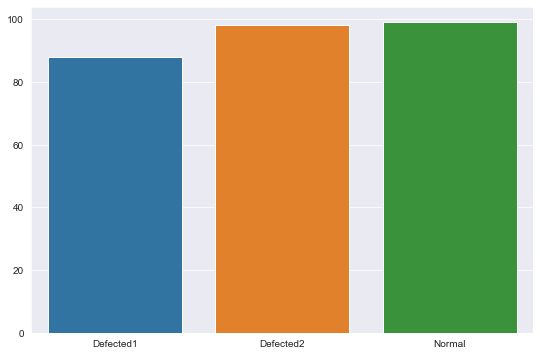

In [4]:
#Plotting the dataset - highlights
data_set = []
amount_of_each = []
for folder in os.listdir(base_path):
    data_set.append(folder)
    amount_of_each.append(len(os.listdir(os.path.join(base_path,folder))))
    
plt.figure(figsize=(9,6))
sns.set_style('darkgrid')
sns.barplot(x = data_set,y = amount_of_each)

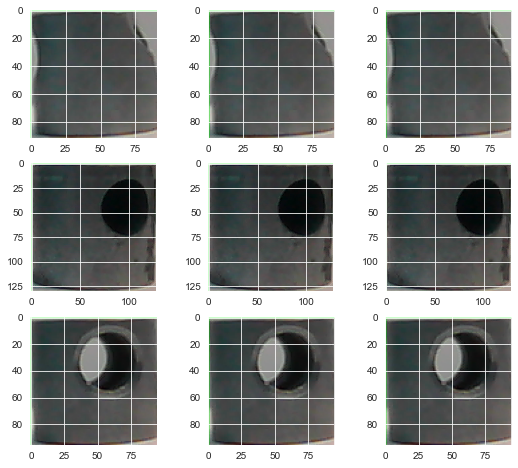

In [5]:
#Plotting the images - from all the 3 subfolders.
fig,ax = plt.subplots(3,3,figsize=(9,8))
for i in range(3):
    file_name = random.choice(os.listdir(os.path.join(base_path,data_set[i])))
    folder = os.path.join(base_path,data_set[i])
    for j in range(3):
        img = cv2.imread(os.path.join(folder,file_name))
        ax[i,j].imshow(img)

#### Model - Using ResNet50

In [6]:
resnet = ResNet50(include_top=False,input_shape=(80,80,3))
for layer in resnet.layers:
    layer.trainable = False
flat = Flatten()((resnet.layers[-1].output))
dense1 = Dense(1024,activation='relu')(flat)
dense2 = Dense(512,activation='relu')(dense1)
drop = Dropout(0.2)(dense2)
model_output = Dense(3,activation = 'softmax')(drop)
model = Model(resnet.input,model_output)

In [7]:
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 80, 80, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 86, 86, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 40, 40, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 40, 40, 64)   256         conv1_conv[0][0]                 
_______________________________________________________________________________________

In [8]:
callback = ModelCheckpoint('./checkpoint.ckt',save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
earlystop = EarlyStopping(monitor='val_accuracy',patience=15,mode='max',restore_best_weights=True)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss = 'categorical_crossentropy',metrics=['accuracy'])

In [9]:
data_gen = ImageDataGenerator(brightness_range=[1.5,2.5],
                              rotation_range = 0.6,validation_split=0.3)

In [10]:
train_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='training')
valid_data = data_gen.flow_from_directory(base_path,target_size=(80,80),subset='validation')

Found 201 images belonging to 3 classes.
Found 84 images belonging to 3 classes.


In [17]:
history= model.fit(train_data,epochs=8,validation_data=valid_data,callbacks=[callback])

Epoch 1/8
7/7 [==============================] - 3s 500ms/step - loss: 1.1441e-04 - accuracy: 1.0000 - val_loss: 0.7228 - val_accuracy: 0.8810
Epoch 2/8
7/7 [==============================] - 3s 469ms/step - loss: 1.8222e-04 - accuracy: 1.0000 - val_loss: 1.0352 - val_accuracy: 0.8452
Epoch 3/8
7/7 [==============================] - 3s 465ms/step - loss: 1.6598e-04 - accuracy: 1.0000 - val_loss: 0.8184 - val_accuracy: 0.8452
Epoch 4/8
7/7 [==============================] - 3s 470ms/step - loss: 0.4667 - accuracy: 0.9552 - val_loss: 16.4191 - val_accuracy: 0.5476
Epoch 5/8
7/7 [==============================] - 3s 468ms/step - loss: 2.2670 - accuracy: 0.8557 - val_loss: 1.5524 - val_accuracy: 0.8690
Epoch 6/8
7/7 [==============================] - 3s 458ms/step - loss: 0.0228 - accuracy: 0.9950 - val_loss: 1.3909 - val_accuracy: 0.8690
Epoch 7/8
7/7 [==============================] - 3s 463ms/step - loss: 0.0329 - accuracy: 0.9950 - val_loss: 1.5374 - val_accuracy: 0.8571
Epoch 8/8
7/7 

#### Graphs for the metrics

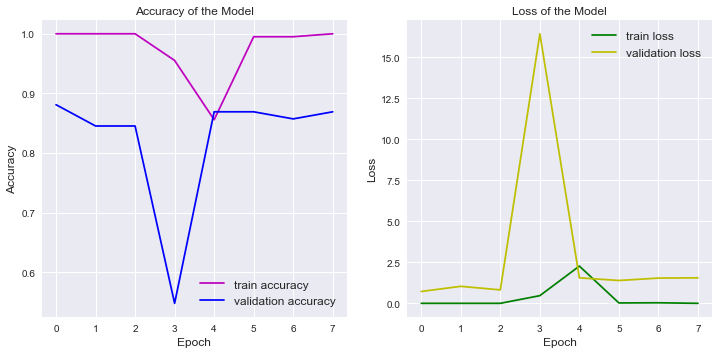

In [18]:
plt.style.use('seaborn')
plt.figure(figsize=(12, 12))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'],'m')
plt.plot(history.history['val_accuracy'],'b')
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'],'g')
plt.plot(history.history['val_loss'],'y')
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

#### Predictions

In [13]:
predictions = model.predict(valid_data)

In [24]:
rp = np.argmax(predictions, axis=-1)
for i in range(10):
    print("Predicted: " + str(rp[i]))

Predicted: 2
Predicted: 2
Predicted: 0
Predicted: 2
Predicted: 0
Predicted: 0
Predicted: 2
Predicted: 0
Predicted: 0
Predicted: 0


#### Random piston image from internet

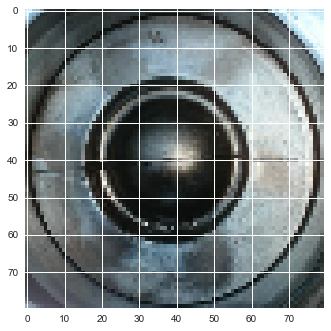

In [56]:
# 1-image
img = cv2.imread('C:/Users/parit/Internship/Data/Piston.jpg')
img1 = cv2.resize(img, (80,80))
plt.imshow(img1)

In [61]:
img2 = img1.reshape((1,80,80,3))

In [62]:
predict = model.predict(img2)
print(predict)

[[1.052689e-06 5.265343e-06 9.999937e-01]]


In [63]:
rp = np.argmax(predict, axis=-1)
print("Predicted: " + str(rp))

Predicted: [2]


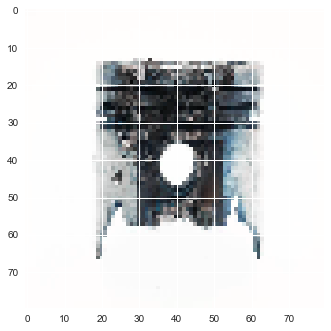

In [19]:
# 2-image
new_img = cv2.imread('C:/Users/parit/Internship/Data/piston1.jpg')
new_img1 = cv2.resize(new_img, (80,80))
plt.imshow(new_img1)

In [20]:
new_img2 = new_img1.reshape((1,80,80,3))

In [21]:
predict1 = model.predict(new_img2)
new_rp = np.argmax(predict1, axis=-1)
print("Predicted: " + str(new_rp))

Predicted: [0]
